## 따릉이 데이터를 활용한 데이터 분석

## 1. 라이브러리 및 데이터
## Library & Data

In [8]:
import pandas as pd #판다스 패키지 불러오기
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('bike/train.csv') 
test = pd.read_csv('bike/test.csv')

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


### 데이터 확인

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

In [4]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


In [5]:
train.shape

(1459, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [7]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


### 상관계수

- 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치 
- -1에서 1사이의 값을 지닙니다. 
- -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다. 
- 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기합니다. 

In [9]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot:>

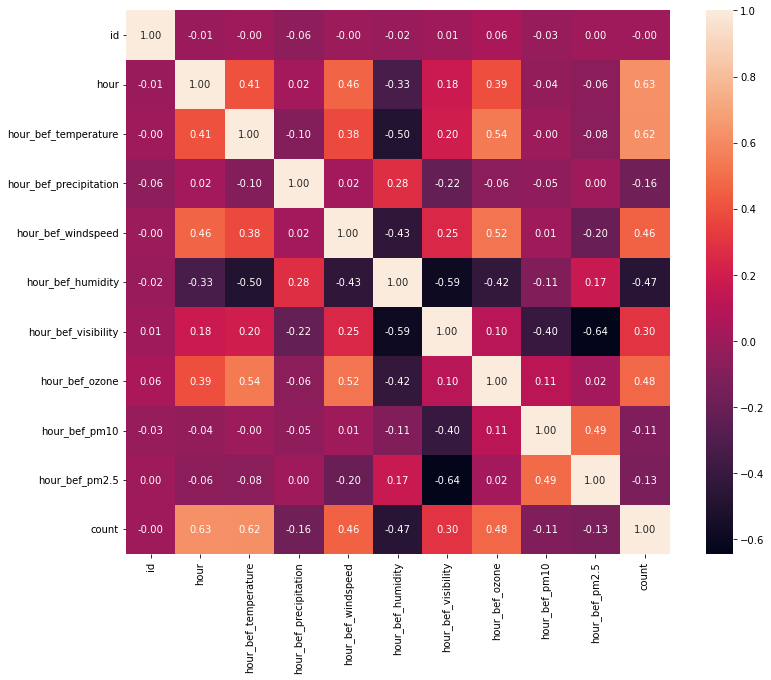

In [10]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(train.corr(),annot=True, fmt = '.2f', square=True)

**양의 상관관계 (0.30 이상)**
- hour
- temperature
- windspeed
- visibility
- ozone

**음의 상관관계**
- humidity

**삭제**
- hour_bef_pm10
- hour_bef_pm2.5


## 3. 데이터 전처리


- 결측치 여부를 확인
- 결측치면 True, 아니면 False

In [11]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [12]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

**hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1**
   * 전부 0으로 처리

In [13]:
train['hour_bef_precipitation'] = 0
test['hour_bef_precipitation'] = 0

In [14]:
train['hour_bef_precipitation'].sum()

0

In [15]:
test['hour_bef_precipitation'].sum()

0

**기온 결측치 시간당 평균으로 대체**

In [16]:
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
train['hour_bef_temperature'].fillna(value = train.groupby('hour').mean()['hour_bef_temperature'].mean(), inplace = True)
test['hour_bef_temperature'].fillna(value = test.groupby('hour').mean()['hour_bef_temperature'].mean(), inplace = True)

In [19]:
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [20]:
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


**풍속 시간당 평균으로 대체**

In [21]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,16.727492,0,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,16.727492,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [23]:
train['hour_bef_windspeed'].fillna(value = train.groupby('hour').mean()['hour_bef_windspeed'].mean(), inplace = True)
test['hour_bef_windspeed'].fillna(value = test.groupby('hour').mean()['hour_bef_windspeed'].mean(), inplace = True)

In [24]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [25]:
test[test['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


**습도 시간당 평균으로 대체**

In [26]:
train[train['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,16.727492,0,2.481154,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,16.727492,0,2.481154,NaN,NaN,NaN,NaN,NaN,1.0


In [31]:
test[test['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


In [28]:
train['hour_bef_humidity'].fillna(value = train.groupby('hour').mean()['hour_bef_humidity'].mean(), inplace = True)
test['hour_bef_humidity'].fillna(value = test.groupby('hour').mean()['hour_bef_humidity'].mean(), inplace = True)

In [29]:
train[train['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [32]:
test[test['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


**가시성 시간당 평균으로 대체**

In [33]:
train[train['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,16.727492,0,2.481154,52.201108,NaN,NaN,NaN,NaN,39.0
1035,1553,18,16.727492,0,2.481154,52.201108,NaN,NaN,NaN,NaN,1.0


In [34]:
test[test['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,23.281327,0,2.394502,56.612117,NaN,NaN,NaN,NaN


In [35]:
train['hour_bef_visibility'].fillna(value = train.groupby('hour').mean()['hour_bef_visibility'].mean(), inplace = True)
test['hour_bef_visibility'].fillna(value = test.groupby('hour').mean()['hour_bef_visibility'].mean(), inplace = True)

In [36]:
train['hour_bef_visibility'].isna().sum()

0

**오존 시간당 평균으로 대체**

In [37]:
train[train['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [38]:
test[test['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
32,82,1,22.800000,0,2.400000,52.000000,2000.000000,NaN,NaN,NaN
40,115,1,21.500000,0,0.500000,90.000000,347.000000,NaN,NaN,NaN
47,147,1,22.800000,0,1.200000,57.000000,1190.000000,NaN,NaN,NaN
86,260,1,20.000000,0,2.000000,65.000000,1662.000000,NaN,NaN,NaN
92,270,1,20.000000,0,1.700000,31.000000,2000.000000,NaN,NaN,NaN
102,297,1,15.100000,0,2.200000,98.000000,224.000000,NaN,NaN,NaN
114,323,1,18.700000,0,1.400000,41.000000,2000.000000,NaN,NaN,NaN
126,352,1,19.200000,0,1.400000,80.000000,1085.000000,NaN,NaN,NaN
129,358,1,23.600000,0,0.900000,83.000000,466.000000,NaN,NaN,NaN
209,609,1,18.600000,0,2.400000,37.000000,2000.000000,NaN,NaN,NaN


In [39]:
train['hour_bef_ozone'].fillna(value = train.groupby('hour').mean()['hour_bef_ozone'].mean(), inplace = True)
test['hour_bef_ozone'].fillna(value = test.groupby('hour').mean()['hour_bef_ozone'].mean(), inplace = True)


In [40]:
train['hour_bef_ozone'].isna().sum(), test['hour_bef_ozone'].isna().sum()

(0, 0)

**필요없는 데이터 삭제**

In [41]:
train = train.drop(['hour_bef_pm2.5','hour_bef_pm10'], axis =1)

In [42]:
test = test.drop(['hour_bef_pm2.5','hour_bef_pm10'], axis =1)

**결측치 제거 확인**

In [43]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
dtype: int64

**전처리한 데이터 저장**

In [44]:
train.to_csv("train_null_only.csv", index = False)
test.to_csv("test_null_only.csv", index = False)